c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\tabulate\__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)


+--------+--------+------------+-------+------+
|   Year |   Prod |   X=x-2014 |   X^2 |   xy |
+========+========+============+=======+======+
|   1949 |    112 |         -6 |    36 | -672 |
+--------+--------+------------+-------+------+
|   1949 |    118 |         -6 |    36 | -708 |
+--------+--------+------------+-------+------+
|   1949 |    132 |         -6 |    36 | -792 |
+--------+--------+------------+-------+------+
|   1949 |    129 |         -6 |    36 | -774 |
+--------+--------+------------+-------+------+
|   1949 |    121 |         -6 |    36 | -726 |
+--------+--------+------------+-------+------+
|   1949 |    135 |         -6 |    36 | -810 |
+--------+--------+------------+-------+------+
|   1949 |    148 |         -6 |    36 | -888 |
+--------+--------+------------+-------+------+
|   1949 |    148 |         -6 |    36 | -888 |
+--------+--------+------------+-------+------+
|   1949 |    136 |         -6 |    36 | -816 |
+--------+--------+------------+-------+

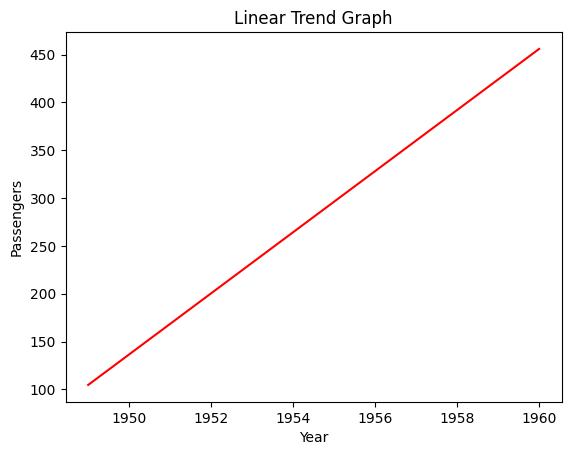

array([3807.89520202])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
train = pd.read_csv('AirPassengers.csv')

train['Month'] = pd.to_datetime(train['Month'], format='%Y-%m')
train['Year'] = train['Month'].dt.year
train.head()

year = train['Year'].values.reshape(-1, 1)
values = train['#Passengers'].values

x=year
y=values

X = [i - x[len(x)//2] for i in x]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, y)]
table = [[i, j, k, l, m] for i, j, k, l, m in zip(x, y, X, x2, xy)]
print(tabulate(table, headers=["Year", "Prod", "X=x-2014", "X^2", "xy"], tablefmt="grid"))

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)
n=len(x)
b=(n*sum(xy)-sum(y)*sum(X))/(n*sum(x2)-(sum(X)**2))
a=(sum(y)-b*sum(X))/n
print("a=%.1f,b=%.1f"%(a,b))

l=[]
for i in range(n):
  l.append(a+b*X[i]);
print("Trend Equation : y=%d+%.2fx"%(a,b))
import matplotlib.pyplot as plt
plt.title("Linear Trend Graph")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(x,l,color='red')
plt.show()

pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

+--------+--------+------------+-------+-------+-------+-------+-------+
|   Year |   Prod |   X=x-2013 |   X^2 |   X^3 |   X^4 |    xy |   x2y |
+========+========+============+=======+=======+=======+=======+=======+
|   1949 |    112 |        -11 |   121 | -1331 | 14641 | -1232 | 13552 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    118 |        -11 |   121 | -1331 | 14641 | -1298 | 14278 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    132 |        -11 |   121 | -1331 | 14641 | -1452 | 15972 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    129 |        -11 |   121 | -1331 | 14641 | -1419 | 15609 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    121 |        -11 |   121 | -1331 | 14641 | -1331 | 14641 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    135 |        -11 |   121 | -1331 | 14

c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\tabulate\__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)


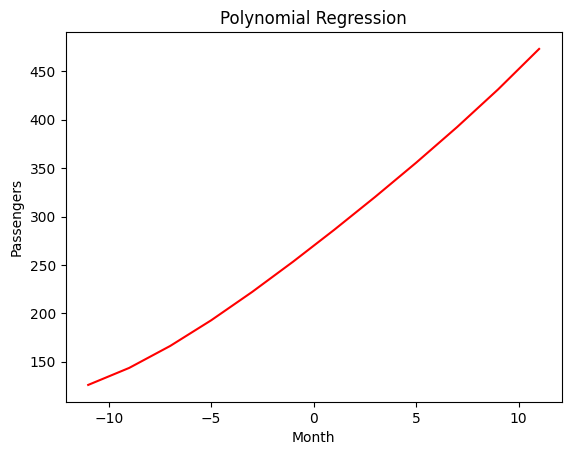

array([96851.8973791])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from tabulate import tabulate
%matplotlib inline

train = pd.read_csv('AirPassengers.csv')
train['Month'] = pd.to_datetime(train['Month'], format='%Y-%m')
train['Year'] = train['Month'].dt.year
train.head()

year = train['Year'].values.reshape(-1, 1)
values = train['#Passengers'].values
x=year
y=values
X = [2*(i-(sum(x)/len(x))) for i in x]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, y)]
x3 = [i ** 3 for i in X]
x4 = [i ** 4 for i in X]
x2y = [i * j for i, j in zip(x2, y)]
table = [[i, j, k, l, m,n,o,p] for i, j, k, l, m,n,o,p in zip(x, y, X, x2, x3,x4,xy,x2y)]
print(tabulate(table, headers=["Year", "Prod", "X=x-2013", "X^2", "X^3", "X^4", "xy", "x2y"], tablefmt="grid"))

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
plt.plot(X, lin2.predict(poly.fit_transform(X)),
color='red')
plt.title('Polynomial Regression')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))